In [1]:
import geopandas as gpd
import os
from sqlalchemy import create_engine
import QC_centerlines as QC

In [2]:
# second check
res = QC.reviewCommonIDs(export=True, commonIDonly=True, update=True)

In [3]:
resSPR = QC.reviewCommonIDs(ugb='SPR', export=True, commonIDonly=True, update=True)

In [4]:
res2 = QC.reviewCommonIDs(export=True, update=True)

In [5]:
resSPR2 = QC.reviewCommonIDs(ugb='SPR', export=True, update=True)

In [6]:
# initial check
res = QC.reviewCommonIDs(export=True, commonIDonly=True)

In [7]:
resSPR = QC.reviewCommonIDs(ugb='SPR', export=True, commonIDonly=True)

In [8]:
res2 = QC.reviewCommonIDs(export=True)

In [9]:
resSPR2 = QC.reviewCommonIDs(ugb='SPR', export=True)

In [10]:
QC.diffInIDs()

Comparison between Central Lane (CL) and Eugene (EUG) street data:

There are 2755 IDs in common between CL and EUG, 104 EUG IDs are not in CL and 86 CL IDs are not in EUG;
In the common IDs, 15 EUG IDs and 111 CL IDs have more than one feature, and 2640 IDs have one feature only in both.


Comparison between Central Lane (CL) and Springfield (SPR) street data:

There are 608 IDs in common between CL and SPR, 310 SPR IDs are not in CL and 59 CL IDs are not in SPR;
In the common IDs, 31 SPR IDs and 58 CL IDs have more than one feature, and 541 IDs have one feature only in both.


In [ ]:
QC.diffInIDs()

In [5]:
path = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\Centerline_Network.gdb'

In [6]:
EUGstreets = gpd.read_file(path, layer='EUG_Streets')
SPRstreets = QC.adjustSPRownerName()
CLstreets = gpd.read_file(path, layer='Centerlines')

In [7]:
EUGstreets.columns

Index(['OBJECTID', 'SEG_ID', 'LCPWID', 'EUGID', 'SPRID', 'LCOGID', 'OWNER',
       'MAINT', 'SOURCE', 'METHOD', 'FCLASS', 'PAVED', 'DIR', 'NAME', 'TYPE',
       'SPEED', 'AIRSSPEED', 'ONEWAY', 'TRAFFLOW', 'AIRSNAME', 'F_ZLEV',
       'T_ZLEV', 'L_LADD', 'L_HADD', 'R_LADD', 'R_HADD', 'CHANGE',
       'CONTRIBUTO', 'TMP', 'INFLINE', 'ACCESS_CNT', 'ROW_Width_',
       'ROW_Widt_1', 'Shape__Len', 'GlobalID', 'Shape_Length', 'geometry'],
      dtype='object')

In [8]:
EUGstreets[EUGstreets.EUGID == 54742][['EUGID', 'OWNER', 'NAME', 'TYPE', 'AIRSNAME', 'FCLASS', 'Shape_Length', 'geometry']]

,EUGID,OWNER,NAME,TYPE,AIRSNAME,FCLASS,Shape_Length,geometry
2753,54742,ODOT,DELTA,HWY,SB DELTA HWY,MAJART,2608.350937,"MULTILINESTRING ((4237030.003 890452.333, 4237..."


In [9]:
CLstreets.columns

Index(['seg_id', 'lcpwid', 'eugid', 'sprid', 'lcogid', 'dir', 'name', 'type',
       'airsname', 'rlidname', 'l_ladd', 'l_hadd', 'r_ladd', 'r_hadd',
       'mailcity', 'county', 'state', 'zipcode', 'fclass', 'fed_class',
       'airsclass', 'cclass', 'paved', 'speed', 'snowroute', 'owner', 'maint',
       'source', 'method', 'contributor', 'ugbcity', 'one_way', 'fnode',
       'tnode', 'f_zlev', 't_zlev', 'optcost', 'road_segment_gfid',
       'Shape_Length', 'geometry'],
      dtype='object')

In [10]:
CLstreets[CLstreets.eugid == 54742][['eugid', 'owner', 'name', 'type', 'rlidname', 'fclass', 'Shape_Length', 'geometry']]

,eugid,owner,name,type,rlidname,fclass,Shape_Length,geometry
1148,54742.0,LCPW,DELTA,HWY,Delta Hwy,MAJART,2608.349576,"MULTILINESTRING ((4237030.003 890452.333, 4236..."


In [11]:
EUGstreets[EUGstreets.EUGID == 54742].geometry.values.length

array([2608.35093677])

In [12]:
EUGstreets[EUGstreets.EUGID == 54742].geometry.values.bounds

array([[4236583.51804462,  887963.79002625, 4237030.00295275,
         890452.33300525]])

In [13]:
CLstreets[CLstreets.eugid == 54742].geometry.values.bounds

array([[4236583.51706037,  887963.79002625, 4237030.00295275,
         890452.33300525]])

In [14]:
SPRstreets.columns

Index(['ADDRKEY', 'AREA', 'DISTRICT', 'FRSTKEY', 'SEGLEN', 'STKEY', 'SUBAREA',
       'SURFTYPE', 'SURFWID', 'TOSTKEY', 'TRUCKROUTE', 'UNITID', 'UNITID2',
       'UNITTYPE', 'RLIDNAME', 'COMPTYPE', 'R_HADD', 'R_LADD', 'L_HADD',
       'L_LADD', 'ONE_WAY', 'SPEED', 'PAVED', 'FCLASS', 'MAINT', 'OWNER',
       'LANES', 'LMiles', 'XMID', 'SNOW', 'TOKEY', 'FSTKEY', 'YMID', 'COMPKEY',
       'Shape_Length', 'geometry'],
      dtype='object')

In [15]:
CLstreets.owner.unique()

array(['EUG', 'SPR', 'ODOT', 'LCPW', 'COB', 'LAR', 'PVT'], dtype=object)

In [16]:
EUGstreets.OWNER.unique()

array(['EUG', 'LCPW', 'ODOT', 'PVT', 'SPR', 'LAR', ' '], dtype=object)

In [17]:
SPRstreets.OWNER.unique()

array(['SPR', 'ODOT', 'LCPW', ' ', 'PVT'], dtype=object)

In [18]:
SPRstreets[SPRstreets.COMPKEY == 1021028][['COMPKEY', 'OWNER', 'RLIDNAME', 'FCLASS', 'Shape_Length', 'geometry']]

,COMPKEY,OWNER,RLIDNAME,FCLASS,Shape_Length,geometry
612,1021028.0,ODOT,S A St,MAJART,701.897708,"MULTILINESTRING ((4256412.299 876698.068, 4256..."


In [19]:
SPRstreets[SPRstreets.COMPKEY == 1021028].geometry.values.bounds

array([[4256412.29888451,  876698.06791338, 4257058.04986876,
         876972.95866142]])

In [20]:
CLstreets[CLstreets.sprid == 1021028][['sprid', 'owner', 'rlidname', 'fclass', 'Shape_Length', 'geometry']]

,sprid,owner,rlidname,fclass,Shape_Length,geometry
2561,1021028.0,SPR,S A St,MINART,420.410569,"MULTILINESTRING ((4256412.299 876698.068, 4256..."
3851,1021028.0,ODOT,S A St,MINART,281.487144,"MULTILINESTRING ((4256799.834 876860.924, 4256..."


In [21]:
type(CLstreets[CLstreets.sprid == 1021028].iloc[0])

pandas.core.series.Series

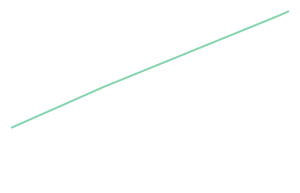

In [22]:
CLstreets[CLstreets.sprid == 1021028].geometry.values[0]

In [23]:
CLstreets[CLstreets.sprid == 1021028].geometry.values[0].bounds

(4256412.298884511, 876698.0679133832, 4256799.83431758, 876860.923884511)

In [24]:
type(CLstreets[CLstreets.sprid == 1021028].geometry.values[0].bounds)

tuple

In [26]:
engine = create_engine(   
"mssql+pyodbc:///?odbc_connect=Driver={ODBC Driver 17 for SQL Server};"
"Server=geodb.int.lcog.org,5433;Database=Springfield_Infrastructure_P;"
"UID=dchen;PWD=SPEED-SURE-MAIL-behind")

In [27]:
sql = '''
SELECT
RLIDNAME,
ONE_WAY,
SPEED,
PAVED,
FCLASS,
OWNER,
LANES,
LMiles,
COMPKEY,
Shape.STAsBinary() AS GEOM
FROM Springfield_Infrastructure_P.SPRADM.Streets_evw;
'''

In [28]:
SPRstreet = gpd.GeoDataFrame.from_postgis(sql, engine, geom_col='GEOM')

In [29]:
SPRstreet.tail()

,RLIDNAME,ONE_WAY,SPEED,PAVED,FCLASS,OWNER,LANES,LMiles,COMPKEY,GEOM
3554,Hosanna Ln,,0.0,N,LOCAL,PVT,0.0,0.0,1017281.0,"LINESTRING (4257974.622 890358.737, 4258028.45..."
3555,Main St,TF,30.0,Y,MAJART,ODOT,2.0,1021.0,100576.0,"LINESTRING (4261145.210 877057.003, 4261160.83..."
3556,Main St,,40.0,Y,MAJART,ODOT,5.0,2556.0,101267.0,"LINESTRING (4281660.835 876353.441, 4282171.46..."
3557,Laura St,,25.0,N,LOCAL,CITY,2.0,720.0,101981.0,"LINESTRING (4256320.585 880618.066, 4256265.71..."
3558,Olympic St,,35.0,Y,MINART,CITY,3.0,898.0,100914.0,"LINESTRING (4269077.460 881723.816, 4269376.71..."
